In [1]:
import tensorflow as tf
from model import build_model
import load_data
import random
import os

import numpy as np
from skimage import data, io
import matplotlib.pyplot as plt

In [36]:
SEED = 42
# for reproducability
def reset_random():
  os.environ['PYTHONHASHSEED'] = str(SEED)
  np.random.seed(SEED)
  tf.random.set_seed(SEED)
  random.seed(SEED)
reset_random()

input_dims = 32
(train_data, val_data, test_data) = load_data.load(input_dims)

model = build_model(input_dims=input_dims, n_clases=len(train_data.class_names))
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Found 4800 files belonging to 4 classes.
Found 400 files belonging to 4 classes.
Found 200 files belonging to 4 classes.
Model: "VGG-liter"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_6 (Rescaling)      (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 64)        36928     
__

In [3]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  print(labels_batch[1])
  break

(32, 32, 32, 1)
(32, 4)
tf.Tensor([1. 0. 0. 0.], shape=(4,), dtype=float32)


In [37]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
# AUTOTUNE = tf.data.AUTOTUNE
#
# train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)
epochs=100
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
    callbacks=[callback]
)

Epoch 1/100
150/150 [==============================] - 11s 70ms/step - loss: 5.0260 - accuracy: 0.2561 - val_loss: 4.8512 - val_accuracy: 0.2525

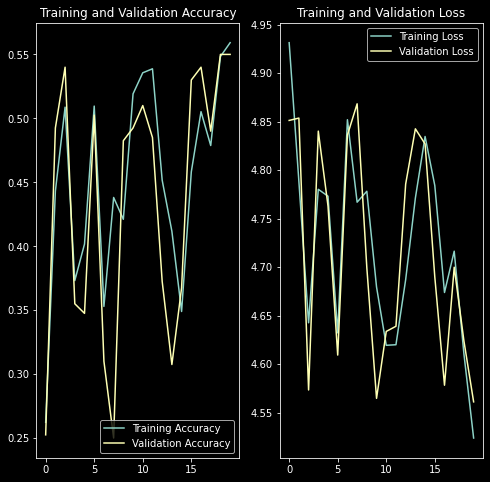

In [27]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(epochs)

plt.style.use("dark_background")

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
# plt.setp(title, color='w')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
# plt.setp(title, color='w')
plt.show()

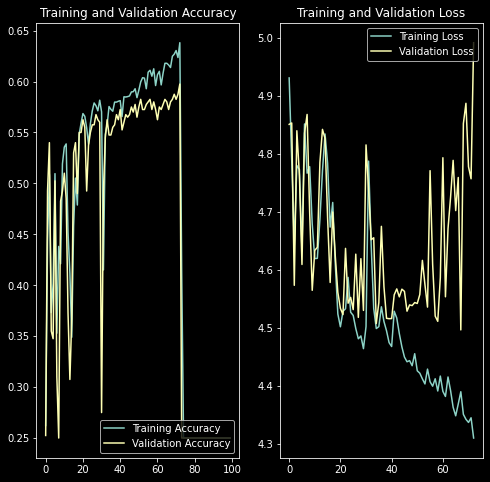

In [34]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(epochs)

plt.style.use("dark_background")

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
# plt.setp(title, color='w')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
# plt.setp(title, color='w')
plt.show()

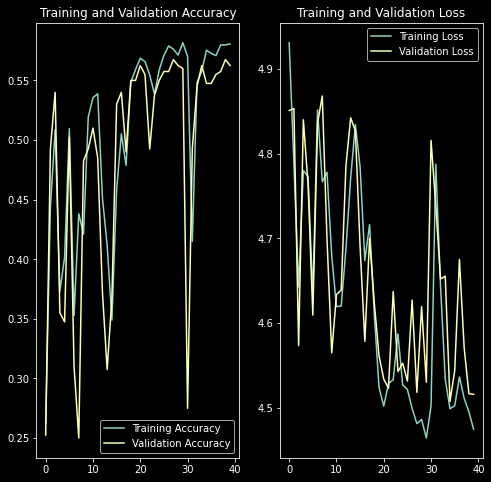

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.style.use("dark_background")

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range[0:len(acc)], acc, label='Training Accuracy')
plt.plot(epochs_range[0:len(val_acc)], val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
# plt.setp(title, color='w')

plt.subplot(1, 2, 2)
plt.plot(epochs_range[0:len(loss)], loss, label='Training Loss')
plt.plot(epochs_range[0:len(val_loss)], val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
# plt.setp(title, color='w')
plt.show()

In [47]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_data)
predictions[0]

array([0., 0., 0., 1.], dtype=float32)

In [49]:
np.argmax(predictions[0])

3

In [50]:
test_data.class_names[3]

'parachute'

In [62]:
predicted_classes = np.argmax(predictions, axis=1)
prediction_outputs = [train_data.class_names[k] for k in predicted_classes]
prediction_outputs

['parachute',
 'church',
 'gas_pump',
 'church',
 'church',
 'church',
 'gas_pump',
 'gas_pump',
 'parachute',
 'parachute',
 'parachute',
 'parachute',
 'parachute',
 'parachute',
 'church',
 'gas_pump',
 'church',
 'gas_pump',
 'church',
 'gas_pump',
 'gas_pump',
 'gas_pump',
 'church',
 'church',
 'parachute',
 'church',
 'church',
 'gas_pump',
 'parachute',
 'gas_pump',
 'church',
 'parachute',
 'church',
 'church',
 'church',
 'church',
 'gas_pump',
 'gas_pump',
 'gas_pump',
 'parachute',
 'church',
 'gas_pump',
 'parachute',
 'church',
 'parachute',
 'parachute',
 'church',
 'gas_pump',
 'church',
 'parachute',
 'church',
 'gas_pump',
 'parachute',
 'parachute',
 'church',
 'church',
 'church',
 'church',
 'parachute',
 'church',
 'gas_pump',
 'parachute',
 'church',
 'parachute',
 'church',
 'parachute',
 'parachute',
 'church',
 'church',
 'parachute',
 'gas_pump',
 'parachute',
 'gas_pump',
 'church',
 'gas_pump',
 'gas_pump',
 'gas_pump',
 'gas_pump',
 'gas_pump',
 'parachute

In [65]:
for images, labels in train_data:
    print(labels)

tf.Tensor(
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]], shape=(32, 4), dtype=float32)
tf.Tensor(
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 

In [42]:
print(f"Final training loss: {history.history['loss'][-1]}")
print(f"Final training acc: {history.history['accuracy'][-1]}")
print(f"Final validation loss: {history.history['val_loss'][-1]}")
print(f"Final validation acc: {history.history['val_accuracy'][-1]}")

Final training loss: 4.474388122558594
Final training acc: 0.5806249976158142
Final validation loss: 4.515669822692871
Final validation acc: 0.5625


In [43]:
import numpy as np
print(f"Best training loss: {np.min(history.history['loss'])}")
print(f"Best training acc: {np.max(history.history['accuracy'])}")
print(f"Best validation loss: {np.min(history.history['val_loss'])}")
print(f"Best validation acc: {np.max(history.history['val_accuracy'])}")

Best training loss: 4.46396017074585
Best training acc: 0.5816666483879089
Best validation loss: 4.507264614105225
Best validation acc: 0.5674999952316284


In [55]:
def load_data_gen(img_dims, batch_size=32, **kwargs):
    rescale = kwargs["rescale"] if "rescale" in kwargs.keys() else 1
    print(rescale)

load_data_gen(3, rescale=2)

{'rescale': 0.00392156862745098}
